### This is Example 4.3. Gambler’s Problem from Sutton's book.

A gambler has the opportunity to make bets on the outcomes of a sequence of coin flips. 
If the coin comes up heads, he wins as many dollars as he has staked on that flip; 
if it is tails, he loses his stake. The game ends when the gambler wins by reaching his goal of $100, 
or loses by running out of money. 

On each flip, the gambler must decide what portion of his capital to stake, in integer numbers of dollars. 
This problem can be formulated as an undiscounted, episodic, finite MDP. 

The state is the gambler’s capital, s ∈ {1, 2, . . . , 99}.
The actions are stakes, a ∈ {0, 1, . . . , min(s, 100 − s)}. 
The reward is zero on all transitions except those on which the gambler reaches his goal, when it is +1.

The state-value function then gives the probability of winning from each state. A policy is a mapping from levels of capital to stakes. The optimal policy maximizes the probability of reaching the goal. Let p_h denote the probability of the coin coming up heads. If p_h is known, then the entire problem is known and it can be solved, for instance, by value iteration.


In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
if "../" not in sys.path:
  sys.path.append("../") 


### Exercise 4.9 (programming)

Implement value iteration for the gambler’s problem and solve it for p_h = 0.25 and p_h = 0.55.



In [2]:
def value_iteration_for_gamblers(p_h, theta=0.0001, discount_factor=1.0):
    """
    Args:
        p_h: Probability of the coin coming up heads
    """
    # states are 0 to 100, 0 and 100 are terminal
    # agent can play between states 1 and 99
    # only state 100 has reward of 1
    # state values are initialized as 0.
    states = list(range(0,101,1))
    actions = list(range(1,99,1))
    rewards = np.append(np.zeros(100),1)
    #depending on state an action there are two possible outcomes
    def transition(state, selected_action):
        return [state+selected_action, state-selected_action]
    
    def one_step_lookahead(s, V, rewards):
        """
        Helper function to calculate the value for all action in a given state.
        
        Args:
            s: The gambler’s capital. Integer.
            V: The vector that contains values at each state. 
            rewards: The reward vector.
                        
        Returns:
            A vector containing the expected value of each action. 
            Its length equals to the number of actions.
        """
#         print("state is", s)
        stakes = range(1, min(s, 100-s)+1)
#         print("possible actions ",stakes)
        action_values = np.zeros(101)
        for action in stakes:
#             print ("in state ",s," evaluating action : ", action)
#              for prob, next_state, reward, done in env.P[state][action]:
#                 action_values[action] += prob * (reward + discount_factor * V[next_state])
            outcomes = transition(s,action)
#             print ("possile outcomes to be updated are ",outcomes)
#             print ("reward of heads :", rewards[outcomes[0]])
            action_values[action] = p_h * (rewards[outcomes[0]]+ discount_factor *  V[outcomes[0]])
            action_values[action] += (1-p_h) * (rewards[outcomes[1]] + discount_factor * V[outcomes[1]])
#         print("action values for 1 step lookahead : ", action_values) 
        return action_values
        
    
    V = np.zeros(101)
    
    # policy is, for each state, how much to bet. So for each state from 1-99, the action to be taken. 
    # For implementational ease state 0 is included too, it should be 0 so can be used to check too.
    policy = np.zeros([100])
    count = 0
    #not needed list to keep action_values for different states
    action_values_for_states = [0] * 101
    while True:
        count += 1 
        change = 0    
        for state in range(100):
            action_values = one_step_lookahead(state, V,rewards)
            highest_action_value = max(action_values)
            change = max(change, abs( highest_action_value - V[state]))
            V[state] = highest_action_value
            policy[state] = np.argmax(action_values)
            action_values_for_states[state] = action_values
        if change < theta:
            break
    print ('the agent found the policy in ', count, 'iterations')
    return policy, V, action_values_for_states

In [12]:
def action_value_plotter(action_values, state, probability):
    """
    takes action values of a state and plots it 
    """
    x = list(range(0,101,1))
    y = action_values
    plt.plot(x, y, 'g')
    plt.xlabel('Actions')
    plt.ylabel('Action Values')
    tit = 'When agent has '+ str(state)+ ' and when the p(heads) is '+ str(probability*100)+ '%'
    plt.title(tit)
    plt.show()
    
def policy_plotter(policy, probability):    
    """
    takes the policy and probability then plots it 
    """
    x = list(range(0,100,1))
    y = policy

    plt.bar(x, y, color='r', align='center', alpha=0.5)
    plt.xlabel('State')
    plt.ylabel('Stake')
    tit = 'Policy (State -> Stack) for p(X=heads) = ',probability
    plt.title(tit)
    plt.show()
    
def state_value_plotter(v, probability):
    """
    takes state values then plots it 
    """
    x = list(range(0,101,1))
    y = v
    
    plt.plot(x, y)

    plt.xlabel('State')
    plt.ylabel('Value')
    tit = 'State Values for p(X=heads) = ',probability
    plt.title(tit)

    # function to show the plot
    plt.show()

the agent found the policy in  8 iterations


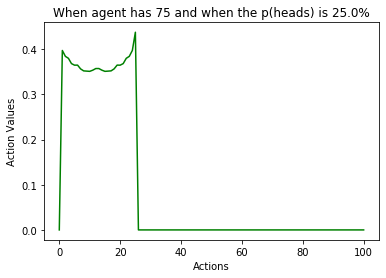

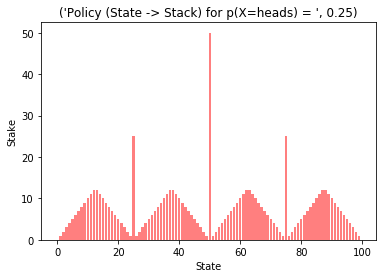

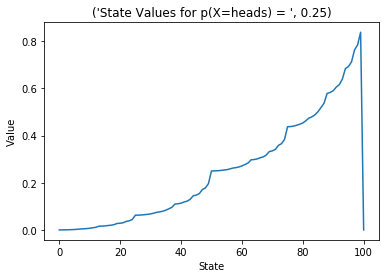

In [13]:
probability_heads = 0.25
policy, v, action_values = value_iteration_for_gamblers(probability_heads)

action_value_plotter(action_values[75],75,probability_heads)
policy_plotter(policy,probability_heads)
state_value_plotter(v, probability_heads)

the agent found the policy in  511 iterations


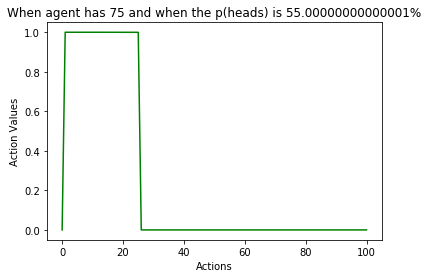

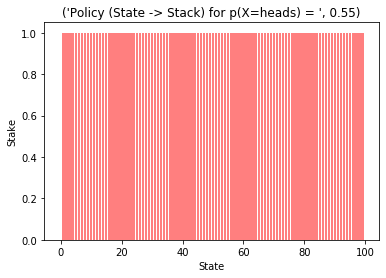

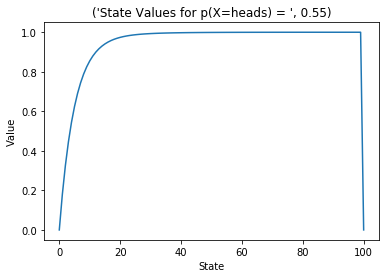

In [14]:
probability_heads = 0.55
policy, v, action_values = value_iteration_for_gamblers(probability_heads)

action_value_plotter(action_values[75],75,probability_heads)
policy_plotter(policy,probability_heads)
state_value_plotter(v, probability_heads)

the agent found the policy in  26 iterations


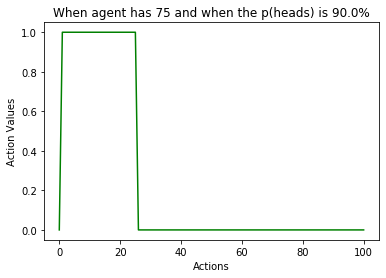

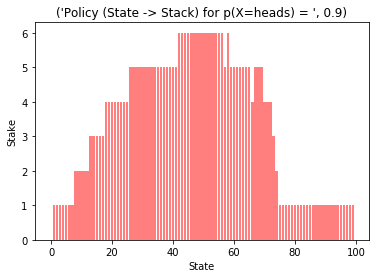

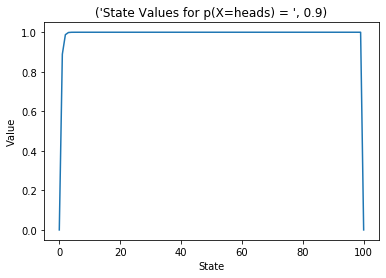

In [15]:
probability_heads = 0.90
policy, v, action_values = value_iteration_for_gamblers(probability_heads)

action_value_plotter(action_values[75],75,probability_heads)
policy_plotter(policy,probability_heads)
state_value_plotter(v, probability_heads)